**1. Problem Statement**
During the Titanic disaster, passenger survival was influenced by factors such as age, gender, and passenger class.
The objective of this project is to build a binary classification machine learning model to predict whether a passenger survived (Yes/No) using historical passenger data and to identify the most important factors affecting survival.

**2. Objectives of the Project**

*   Understand passenger survival patterns

*   Perform basic data preprocessing
*   Conduct minimal but meaningful EDA
*   Build binary classification models
*   Evaluate model performance
*   Evaluate model performance






In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("dataset shape:",df.shape)

dataset shape: (891, 12)


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#handling missing values
num_cols=["Age"]
for col in num_cols:
  df[col]=df[col].fillna(df[col].median())
num_col1=["Embarked"]
for c in num_col1:
  df[c]=df[c].fillna(df[c].mode())
print(df)
if 'Cabin' in df.columns:
  df.drop(columns=['Cabin'],inplace=True)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

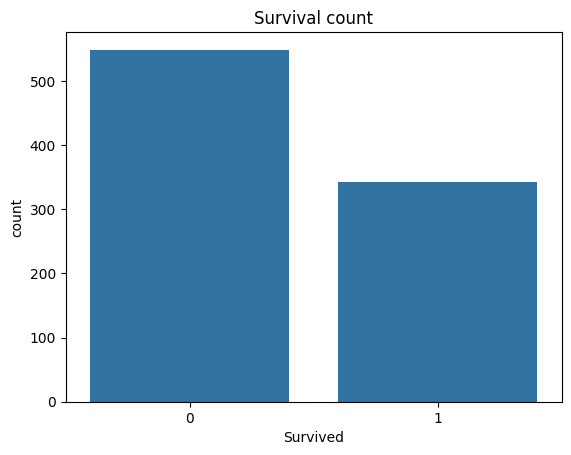

In [ ]:
#Explortory data analysis
#graph durvival count plot

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived',data=df)
plt.title("Survival count")
plt.show()

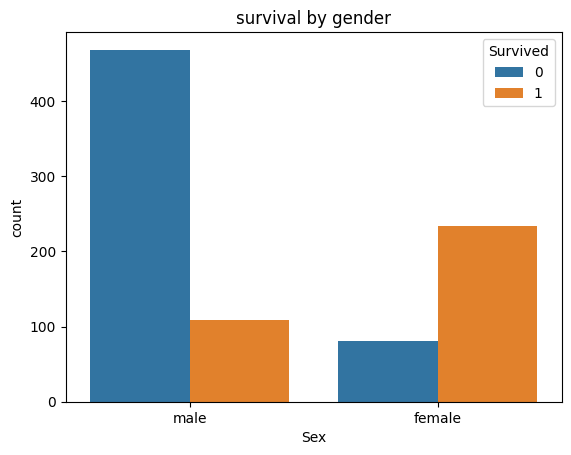

In [ ]:
#graph survival by gender
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("survival by gender")
plt.show()

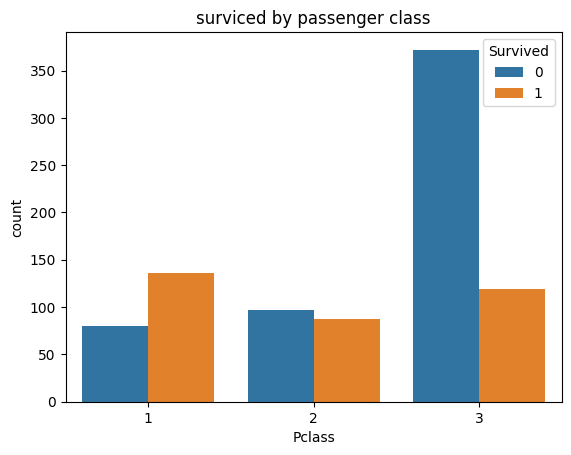

In [ ]:
#graph  surival by passenger class
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("surviced by passenger class")
plt.show()

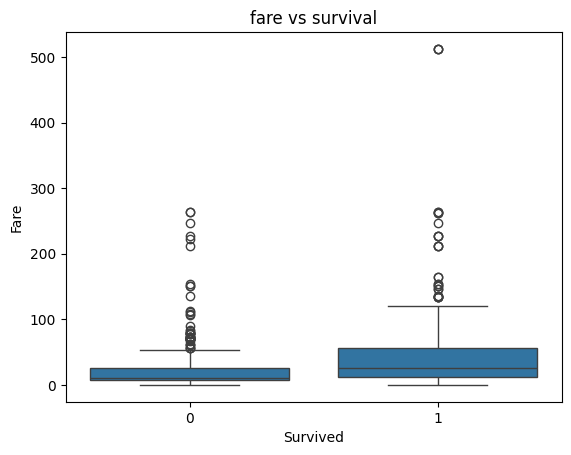

In [ ]:
#fare and survival
sns.boxplot(x='Survived',y='Fare',data=df)
plt.title("fare vs survival")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [ ]:
X=df[["Pclass","Sex","Age","Parch","Fare","Embarked"]]
y=df[["Survived"]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
predicted=model.predict([[3,1,22,0,7.2500,2]])
print("survived(1)or not(0):",predicted[0])
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


survived(1)or not(0): 0


In [ ]:
X=df[["Pclass","Sex","Age","Parch","Fare","Embarked"]]
y=df[["Survived"]]

In [ ]:
X=train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [ ]:
model=DecisionTreeClassifier(criterion="gini",max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred=model.predict(X_test)
print("predicted:",y_pred)

predicted: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7988826815642458


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
#model evaluation
def evaluate_model(y_test,y_pred):
  print("Accuarcy:",accuracy_score(y_test,y_pred))
  print("Precision:",precision_score(y_test,y_pred))
  print("Recall:",recall_score(y_test,y_pred))
  print("F1_score:",f1_score(y_test,y_pred))
evaluate_model(y_test,y_pred)

Accuarcy: 0.7988826815642458
Precision: 0.796875
Recall: 0.6891891891891891
F1_score: 0.7391304347826086


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_rf)


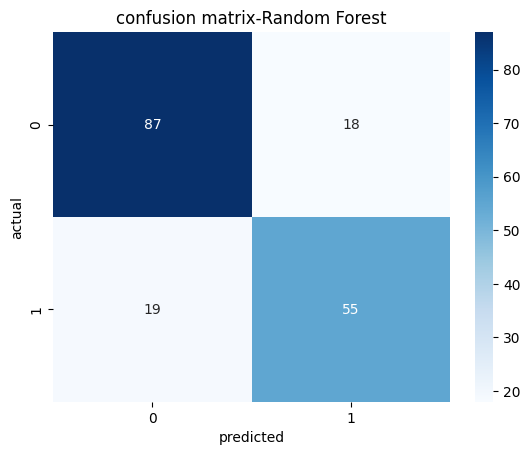

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix-Random Forest")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



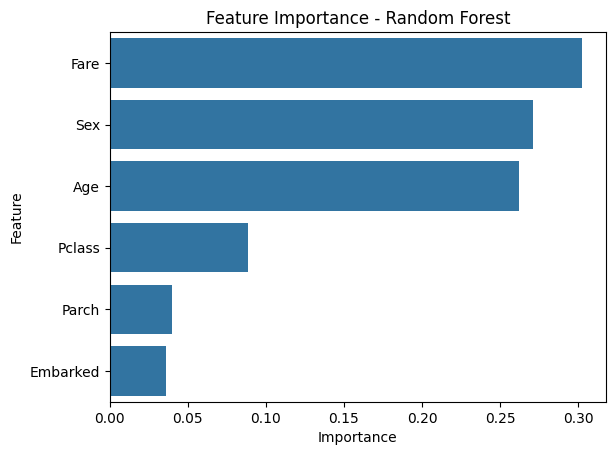

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

# Feature importance
importances = rf.feature_importances_
feature = X_train.columns

feat_df = pd.DataFrame({
    'Feature': feature,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting

sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance - Random Forest')
plt.show()